## Retriving clean data 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings('ignore')

clean_df=pd.read_excel(r'/Users/supreetkaur/Documents/DAB402-main/Clean_data.xls') ## Retriveing Data from file
clean_df.columns

clean_df.drop(['Unnamed: 0'], axis=1,inplace=True)
clean_df

,ID,year_Birth,Income,child_at_Home,teen_at_Home,Recency,amt_Wines,amt_Fruits,amt_MeatProducts,amt_FishProducts,...,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,Response,EducationCodes,marital_StatusCodes,Education,marital_Status,dt_Customer
0,5524.0,1957.0,58138,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0,0.0,0.0,0,1.0,2,4,Graduation,Single,2012-04-09
1,2174.0,1954.0,46344,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0,0.0,0.0,0,0.0,2,4,Graduation,Single,2014-08-03
2,4141.0,1965.0,71613,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0,0.0,0.0,0,0.0,2,5,Graduation,Together,2013-08-21
3,6182.0,1984.0,26646,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0,0.0,0.0,0,0.0,2,5,Graduation,Together,2014-10-02
4,5324.0,1981.0,58293,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0,0.0,0.0,0,0.0,4,3,PhD,Married,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,1967.0,61223,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,0,0.0,0.0,0,0.0,2,3,Graduation,Married,2013-03-03
2228,4001.0,1946.0,64014,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,0,1.0,0.0,0,0.0,4,5,PhD,Together,2012-12-08
2229,7270.0,1981.0,56981,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,0,0.0,0.0,0,0.0,2,2,Graduation,Divorced,2014-05-18
2230,8235.0,1956.0,69245,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,0,0.0,0.0,0,0.0,3,5,Master,Together,2013-03-16


### Performing Normalization on data using Min Max Scaler

### Removing categorical variables

In [5]:
clean_df = clean_df[clean_df.columns[~clean_df.columns.isin(['Education','marital_Status', 'dt_Customer'])]]

### Using MinMaxScaler Normalization to scale the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
clean_df=pd.DataFrame(scaler.fit_transform(clean_df),columns=clean_df.columns)


In [7]:
clean_df

,ID,year_Birth,Income,child_at_Home,teen_at_Home,Recency,amt_Wines,amt_Fruits,amt_MeatProducts,amt_FishProducts,...,num_WebVisitsMonth,acceptedCmp3,acceptedCmp4,acceptedCmp5,acceptedCmp1,acceptedCmp2,Complain,Response,EducationCodes,marital_StatusCodes
0,0.493611,0.621359,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.625
1,0.194263,0.592233,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.625
2,0.370029,0.699029,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.750
3,0.552408,0.883495,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.750
4,0.475739,0.854369,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,0.971316,0.718447,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.500
2228,0.357519,0.514563,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.750
2229,0.649629,0.854369,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,0.375
2230,0.735859,0.611650,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,...,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.750


### Dividing the data to train test split

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
dfX=clean_df[clean_df.columns[~clean_df.columns.isin(['Response'])]] # all the independent variable is stored in dfX
dfY = clean_df["Response"] # extracting dependent variable from the dataset
dfY = dfY.astype(int) # converting response variable to int other KNN will treat this as continuous 

In [11]:

X_train, X_test, y_train, y_test = train_test_split(dfX,dfY, test_size=0.2,random_state=34) 


## Modelling using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### Choosing  the appropriate k-value

In [13]:
error_rate=[]
for i in range(1,50): # sqrt of rows is 47.3
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Text(0, 0.5, 'Error rate')

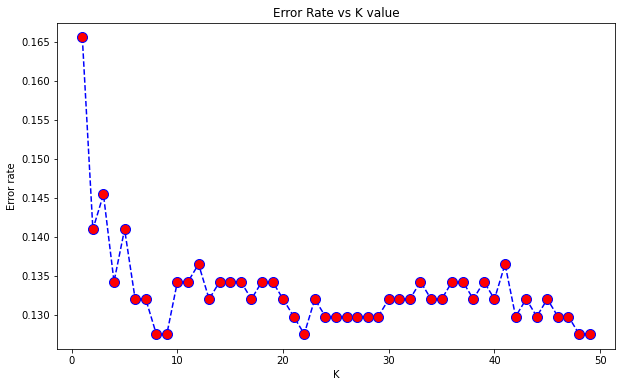

In [14]:

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

### checking with k=10

In [15]:
# number of neighbors are set to optimal k value that is k=10
knn=KNeighborsClassifier(n_neighbors=10)

# fit the model
knn.fit(X_train,y_train)

# predicted the model with the testing dataset
pred_k=knn.predict(X_test)
pred_k

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       384
           1       0.57      0.21      0.30        63

    accuracy                           0.87       447
   macro avg       0.72      0.59      0.61       447
weighted avg       0.84      0.87      0.84       447

86.57718120805369


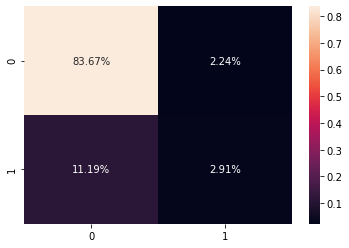

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

# plot the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_k)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

# classification report defines the 
# precision: that focus on true positive values=tp/tp+tn
# recall: definess the predicted true positive value = tp/tp+fn
# f1-score combine both

print(classification_report(y_test,pred_k))

# check with accuracy how accurate out predicted dataset is.
print(accuracy_score(y_test,pred_k)*100)

###  Modelling with Decision tree

In [57]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree

model=tree.DecisionTreeClassifier(min_impurity_decrease=0.005)

# fit the predicted model using the train data points.
d_tree_fit=model.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       384
           1       0.64      0.14      0.23        63

    accuracy                           0.87       447
   macro avg       0.76      0.56      0.58       447
weighted avg       0.84      0.87      0.83       447

86.80089485458613


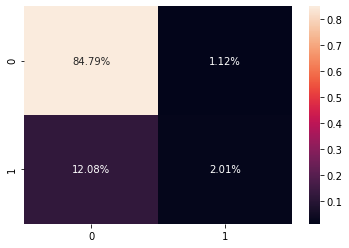

In [58]:
# predict the test data set
d_tree_predict=d_tree_fit.predict(X_test)

# plot confusion_ matrix to get actual and predicted values.
cf_matrix = confusion_matrix(y_test,d_tree_predict)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

# classification report defines the 
# precision: that focus on true positive values=tp/tp+tn
# recall: definess the predicted true positive value = tp/tp+fn
# f1-score combine both

print(classification_report(y_test,d_tree_predict))

# checking with the how often predicted datapoints are accurate from all actual values.
print( accuracy_score(y_test,d_tree_predict)*100)

### Plot the decision tree

In [59]:
plot_tree

<function sklearn.tree._export.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)>

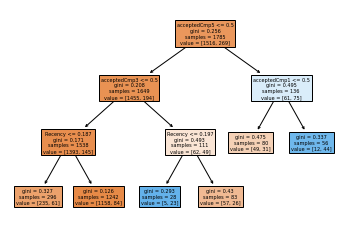

In [60]:
dec_tree = plot_tree(decision_tree=d_tree_fit, feature_names = clean_df.columns, 
                      filled = True )


### using entropy

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       384
           1       0.73      0.30      0.43        63

    accuracy                           0.89       447
   macro avg       0.81      0.64      0.68       447
weighted avg       0.87      0.89      0.86       447

Accuracy :  88.59060402684564


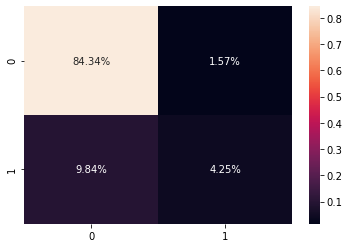

In [61]:
d_tree_entropy=tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005)

## train decision tree classifier
d_tree_fit_entropy=d_tree_entropy.fit(X_train,y_train)

## predict with testing set
d_tree_predict=d_tree_fit_entropy.predict(X_test)

##check with the confusion ,matrix
cf_matrix = confusion_matrix(y_test,d_tree_predict)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

print(classification_report(y_test,d_tree_predict))

## check how often your selected classifier is correct
print("Accuracy : ", accuracy_score(y_test,d_tree_predict)*100)

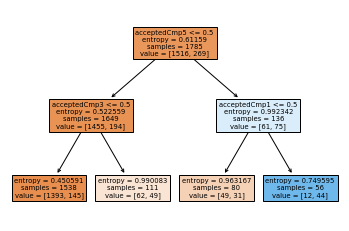

In [21]:
dec_tree = plot_tree(decision_tree=d_tree_fit_entropy, feature_names = clean_df.columns, 
                      filled = True , precision = 6)


###  Modelling with Logistic Regression

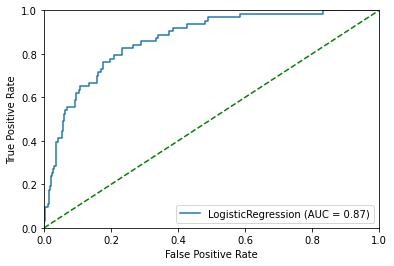

In [22]:
from sklearn.linear_model import LogisticRegression


model=LogisticRegression()
# fitting the model
model.fit(X_train,y_train)

metrics.plot_roc_curve(model, X_test, y_test) 
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [23]:
predict_logistic=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       384
           1       0.58      0.29      0.38        63

    accuracy                           0.87       447
   macro avg       0.74      0.63      0.66       447
weighted avg       0.85      0.87      0.85       447

87.02460850111858


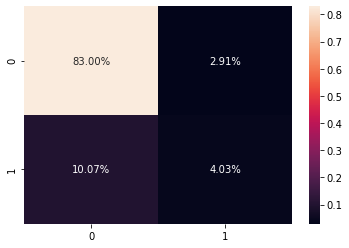

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix


cf_matrix = confusion_matrix(y_test,predict_logistic)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

print(classification_report(y_test,predict_logistic))

print(accuracy_score(y_test,predict_logistic)*100)

### Random Forest

In [25]:
from sklearn.ensemble  import RandomForestClassifier  

In [26]:
# number of decision tree are used are mentioned in the estimators.
model=RandomForestClassifier(n_estimators=20) 

In [27]:
# fit the model using the traininf datasets
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=20)

In [28]:
# to check model accuracy
model.score(X_test,y_test)

0.8680089485458613

In [29]:
# predict the model with test dataset
model_predicted=model.predict(X_test) 
model_predicted

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

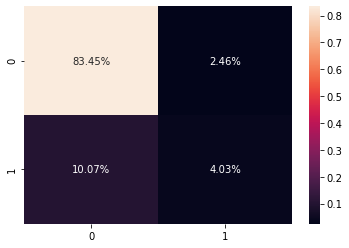

In [36]:
#from sklearn.metrics import confusion_matrix

# plot the confusion_matrix to check with the predicted and actual values.
cf_matrix = confusion_matrix(y_test,model_predicted)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

